In [207]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Adidas.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount
0,Foot Locker,1185732.0,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,50%,In-store,0.0
1,Foot Locker,1185732.0,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,30%,In-store,0.0
2,Foot Locker,1185732.0,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,35%,In-store,0.0
3,Foot Locker,1185732.0,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,35%,In-store,0.0
4,Foot Locker,1185732.0,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,30%,In-store,0.0


In [10]:
df.tail(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount
9638,Foot Locker,1185732,12/17/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$61.00,144,"$8,784","$3,514",40%,Outlet,0
9639,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$36.00,165,"$5,940","$2,198",37%,Outlet,0
9640,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$36.00,93,"$3,348","$1,339",40%,Outlet,0
9641,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,$35.00,99,"$3,465",$936,27%,Outlet,0
9642,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,$33.00,51,"$1,683",$471,28%,Outlet,0
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet,0
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet,0
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet,0
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet,0
9647,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,$29.00,83,"$2,407",$650,27%,Outlet,0


In [11]:
df.shape

(9648, 14)

In [12]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', ' Price per Unit ', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Discount'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7    Price per Unit   9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
 13  Discount          9648 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


In [129]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.describe(include = 'object')

,Retailer,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648
unique,6,5,50,52,6,94,3138,4187,66,3
top,Foot Locker,West,California,Portland,Men's Street Footwear,$50.00,"$100,000","$105,000",35%,Online
freq,2637,2448,432,360,1610,675,67,39,1309,4889


In [16]:
df.describe(include='int64')

,Retailer ID,Discount
count,9.648000e+03,9648.0
mean,1.173850e+06,0.0
std,2.636038e+04,0.0
min,1.128299e+06,0.0
25%,1.185732e+06,0.0
50%,1.185732e+06,0.0
75%,1.185732e+06,0.0
max,1.197831e+06,0.0


In [17]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Retailer
['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
--------------------------------------------------
Region
['Northeast' 'South' 'West' 'Midwest' 'Southeast']
--------------------------------------------------
State
['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']
--------------------------------------------------
City
['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattl

In [18]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
 Price per Unit     0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Discount            0
dtype: int64

In [42]:

df["Invoice Date"]

0        1/1/2020
1        1/2/2020
2        1/3/2020
3        1/4/2020
4        1/5/2020
          ...    
9643    1/24/2021
9644    1/24/2021
9645    2/22/2021
9646    2/22/2021
9647    2/22/2021
Name: Invoice Date, Length: 9648, dtype: object

In [71]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df["Month"] = df["Invoice Date"].dt.month
df.Month =df.Month.astype("category")
df["Year"] = df["Invoice Date"].dt.year
df.Year =df.Year.astype("category")
df.Year

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
9643    2021
9644    2021
9645    2021
9646    2021
9647    2021
Name: Year, Length: 9648, dtype: category
Categories (2, int64): [2020, 2021]

In [45]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
 Price per Unit     0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Discount            0
Month               0
Year                0
dtype: int64

In [68]:
df[" Price per Unit "]



0        5
1        5
2        4
3       45
4        6
        ..
9643     5
9644    41
9645    41
9646    42
9647    29
Name:  Price per Unit , Length: 9648, dtype: int32

In [53]:
df[(df["Product"] =="Men's Apparel" )& (df["Retailer"] == "Foot Locker")]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store,0
10,Foot Locker,1185732,1/23/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,Outlet,0
16,Foot Locker,1185732,1/29/2020,Northeast,New York,New York,Men's Apparel,$60.00,850,"$510,000","$153,000",30%,Outlet,0
22,Foot Locker,1185732,2/4/2020,Northeast,New York,New York,Men's Apparel,$60.00,825,"$495,000","$148,500",30%,Outlet,0
28,Foot Locker,1185732,2/10/2020,Northeast,New York,New York,Men's Apparel,$60.00,875,"$525,000","$157,500",30%,Outlet,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9409,Foot Locker,1185732,10/8/2021,Northeast,Rhode Island,Providence,Men's Apparel,$40.00,23,$920,$304,33%,Outlet,0
9625,Foot Locker,1185732,10/19/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,58,"$2,900",$928,32%,Outlet,0
9631,Foot Locker,1185732,11/18/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$59.00,96,"$5,664","$1,926",34%,Outlet,0
9637,Foot Locker,1185732,12/17/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,123,"$6,150","$2,276",37%,Outlet,0


In [154]:
df[" Price per Unit "] = df[" Price per Unit "].astype("str")

df[" Price per Unit "]=df[" Price per Unit "].str.strip("$")
df[" Price per Unit "]=df[" Price per Unit "].str.strip(" ")
df[" Price per Unit "]=df[" Price per Unit "].str.strip(".00")

price1 = 51000/850
price2=20000/500

df.loc[6725,' Price per Unit'] =price1
df.loc[7882,' Price per Unit'] =price2

df.isna().mean()


Retailer            0.000207
Retailer ID         0.000207
Invoice Date        0.000207
Region              0.000207
State               0.000207
City                0.000207
Product             0.000207
 Price per Unit     0.000000
Units Sold          0.000207
Total Sales         0.000207
Operating Profit    0.000207
Operating Margin    0.000207
Sales Method        0.000207
Discount            0.000207
 Price per Unit     0.999793
dtype: float64

In [80]:
df.sample(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount,Price per Unit,Month,Year,Price per Unit
1532,Kohl's,1185732,2021-05-10,West,Wyoming,Cheyenne,Women's Apparel,55,600,"$330,000","$82,500",25%,In-store,0,NaN,5,2021,NaN
7440,Sports Direct,1185732,2021-06-05,Northeast,Connecticut,Hartford,Women's Athletic Footwear,42,80,"$3,360","$1,411",42%,Online,0,NaN,6,2021,NaN
551,West Gear,1128299,2020-02-22,West,Nevada,Las Vegas,Women's Athletic Footwear,6,400,"$240,000","$72,000",30%,In-store,0,NaN,2,2020,NaN
9522,Amazon,1185732,2021-05-10,Northeast,Vermont,Burlington,Women's Athletic Footwear,4,83,"$3,320","$1,328",40%,Outlet,0,NaN,5,2021,NaN
9622,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,44,99,"$4,356","$1,917",44%,Outlet,0,NaN,10,2021,NaN
6816,Foot Locker,1185732,2021-10-12,Midwest,South Dakota,Sioux Falls,Women's Athletic Footwear,43,36,"$1,548",$697,45%,Online,0,NaN,10,2021,NaN
8197,Foot Locker,1185732,2021-12-26,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,75,"$3,975","$1,431",36%,Outlet,0,NaN,12,2021,NaN
8027,Kohl's,1189833,2021-04-28,West,California,Los Angeles,Women's Athletic Footwear,29,228,"$6,612","$2,645",40%,Outlet,0,NaN,4,2021,NaN
6766,Foot Locker,1185732,2021-02-12,Midwest,Kansas,Wichita,Men's Athletic Footwear,39,47,"$1,833",$807,44%,Online,0,NaN,2,2021,NaN
2551,Amazon,1185732,2021-07-21,Southeast,Kentucky,Louisville,Men's Apparel,5,250,"$125,000","$43,750",35%,Online,0,NaN,7,2021,NaN


In [81]:
df.duplicated().sum()

0

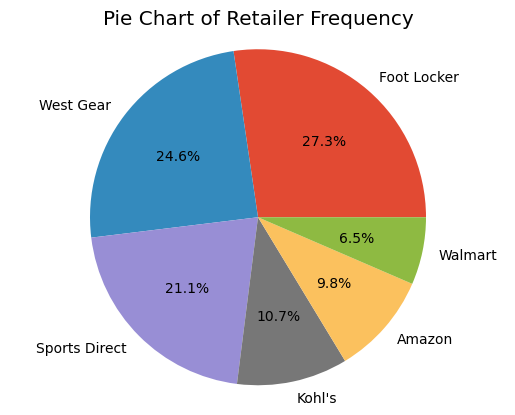

In [85]:
retailer_counts = df['Retailer'].value_counts()
retailer_labels = retailer_counts.index.to_list()

plt.pie(retailer_counts, labels=retailer_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Retailer Frequency")
plt.axis('equal') 

plt.show()

In [86]:
df.Retailer.value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

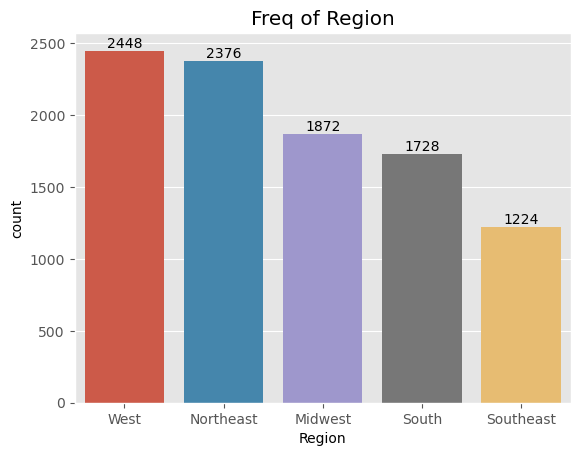

In [91]:
plt.title("Freq of Region")
figer= sns.countplot(x= "Region" ,data= df, order = df.Region.value_counts().index)
for cotain in figer.containers :
    figer.bar_label(cotain)
plt.show()

In [93]:
df.Region.value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

In [94]:
df.Product.value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

In [95]:
df.Product.unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

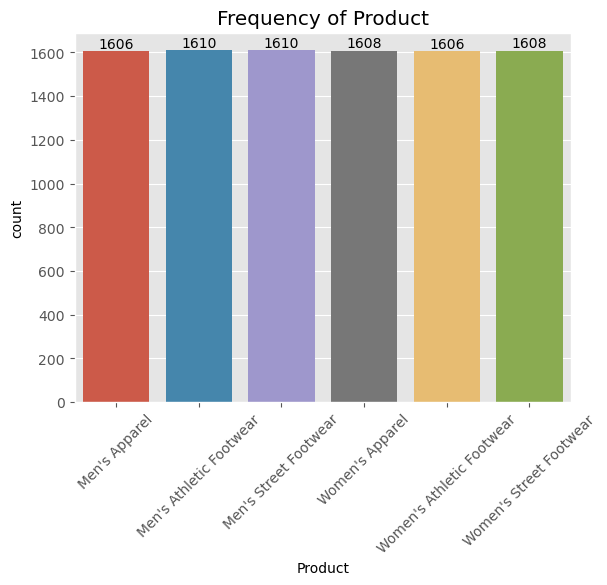

In [100]:
df.loc[df.Product == "Men's aparel" ,"Product"]  ="Men's Apparel"  
df.Product.value_counts()
df.Product = df.Product.astype("category")
plt.title("Frequency of Product")
figer = sns.countplot(data= df , x="Product") 
for cotain in figer.containers :
    figer.bar_label(cotain)
plt.xticks(rotation= 45)
plt.show()

In [128]:
df["Units Sold"] = df["Units Sold"].str.replace("," ,"")
df["Units Sold"] =df["Units Sold"].astype("int")
df["Units Sold"]

0       1200
1       1000
2       1000
3        850
4        900
        ... 
9643      64
9644     105
9645     184
9646      70
9647      83
Name: Units Sold, Length: 9648, dtype: int32

In [126]:
df.sample()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount
3977,Sports Direct,1197831,8/9/2020,South,Texas,Houston,Women's Athletic Footwear,$36.00,163,"$5,868","$3,462",59%,Online,0


In [135]:

df.sample(6)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount
3472,Kohl's,1185732,5/6/2021,Northeast,New Jersey,Newark,Men's Athletic Footwear,$45.00,225,"$101,250","$35,438",35%,In-store,0
1064,Foot Locker,1185732,7/20/2021,Midwest,Nebraska,Omaha,Men's Street Footwear,$40.00,300,"$120,000","$48,000",40%,Outlet,0
8377,Sports Direct,1197831,8/30/2021,South,Alabama,Birmingham,Women's Apparel,$36.00,263,"$9,468","$6,249",66%,Outlet,0
9627,Foot Locker,1185732,11/18/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$59.00,149,"$8,791","$3,780",43%,Outlet,0
8592,West Gear,1185732,6/11/2021,West,Utah,Salt Lake City,Women's Athletic Footwear,$13.00,132,"$1,716",$738,43%,Outlet,0
6416,Amazon,1185732,3/21/2021,Southeast,Kentucky,Louisville,Women's Apparel,$42.00,65,"$2,730","$1,392",51%,Online,0


In [136]:
df["Operating Profit"]=df["Operating Profit"].str.strip("$")
df["Operating Profit"]=df["Operating Profit"].str.replace(",", "")
df.loc[df["Operating Profit"]=="","Operating Profit"] ="0"
df["Operating Profit"] =df["Operating Profit"].astype("float")

In [137]:
df["Gender"] = df["Product"].str.contains("Men")
df.Gender = df.Gender.map({True :"Male" ,False :"Female"})

In [138]:
df["Units Sold"].max()

'99'

In [139]:
df


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount,Gender
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000",300000.0,50%,In-store,0,Male
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000",150000.0,30%,In-store,0,Male
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000",140000.0,35%,In-store,0,Female
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500",133875.0,35%,In-store,0,Female
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000",162000.0,30%,In-store,0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",896.0,28%,Outlet,0,Male
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305",1378.0,32%,Outlet,0,Female
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544",2791.0,37%,Outlet,0,Male
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940",1235.0,42%,Outlet,0,Male


In [140]:
df["Units Sold"].unique()

array(['1,200', '1,000', '850', '900', '1,250', '950', '825', '1,220',
       '925', '800', '875', '1,050', '1,275', '1,025', '1,100', '1,075',
       '1,150', '975', '920', '700', '550', '675', '625', '500', '600',
       '650', '725', '525', '775', '750', '575', '450', '425', '475',
       '275', '125', '175', '225', '100', '495', '200', '75', '150',
       '250', '350', '325', '400', '375', '300', '195', '50', '445', '25',
       '470', '1,070', '1,125', '745', '145', '420', '0', '95', '545',
       '570', '320', '870', '820', '520', '770', '795', '620', '295',
       '670', '345', '1,020', '1,045', '695', '945', '595', '220', '720',
       '395', '645', '245', '270', '170', '336', '260', '247', '234',
       '313', '261', '276', '206', '243', '290', '354', '259', '216',
       '230', '238', '252', '239', '215', '317', '278', '305', '319',
       '267', '231', '286', '308', '257', '241', '360', '268', '280',
       '236', '299', '273', '258', '254', '263', '312', '285', '210',
     

In [142]:
df.describe().round(2)

,Retailer ID,Operating Profit,Discount
count,9648.00,9648.00,9648.0
mean,1173849.72,34425.28,0.0
std,26360.38,54193.12,0.0
min,1128299.00,0.00,0.0
25%,1185732.00,1922.00,0.0
50%,1185732.00,4371.50,0.0
75%,1185732.00,52063.00,0.0
max,1197831.00,390000.00,0.0


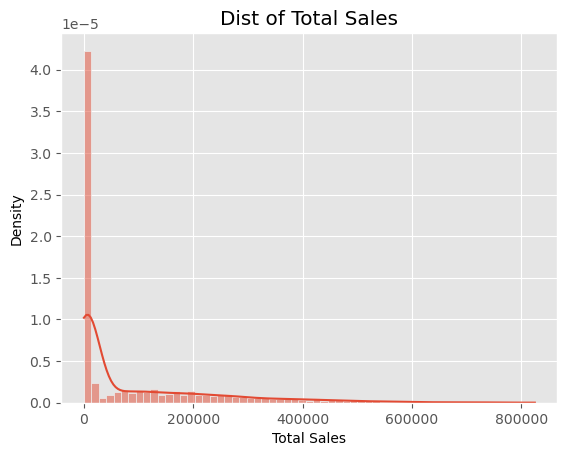

In [161]:



sns.histplot(df["Total Sales"] ,kde=True ,stat="density")
plt.title("Dist of Total Sales")
plt.show()

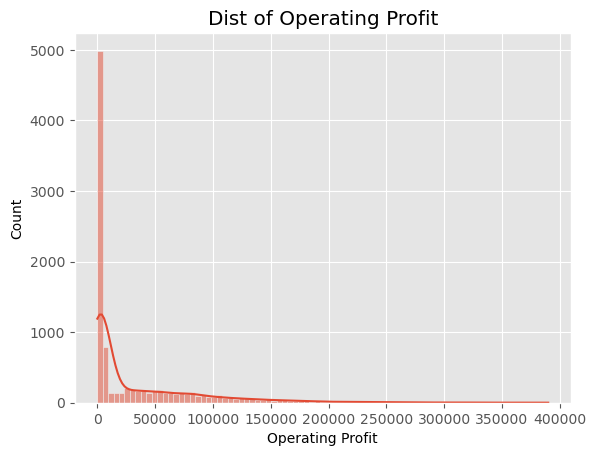

In [162]:
sns.histplot(df["Operating Profit"] ,kde=True )
plt.title("Dist of Operating Profit")
plt.show()

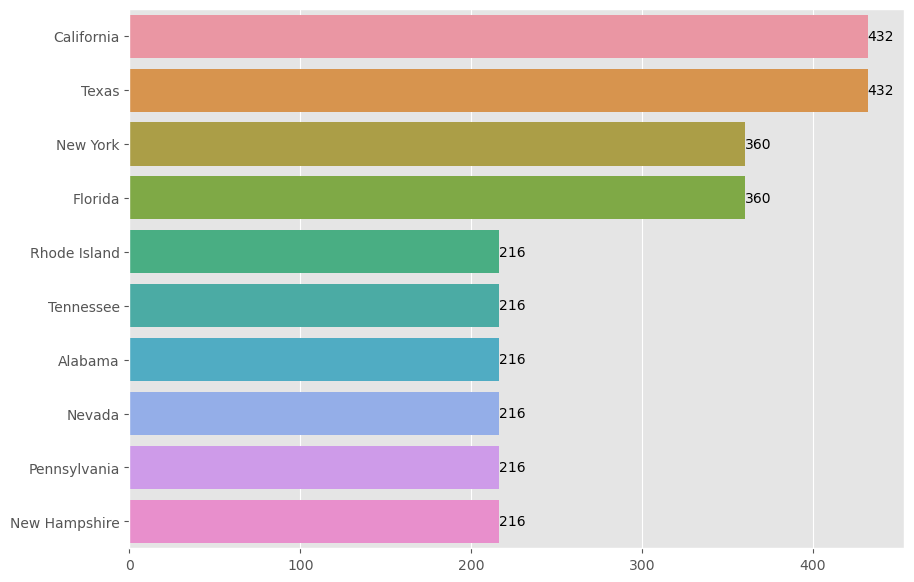

In [165]:
plt.figure(figsize=(10,7))
figer = sns.barplot(y= df["State"].value_counts().sort_values(ascending=False)[:10] .index , 
           x = df["State"].value_counts().sort_values(ascending=False)[:10] .values )
for contain in figer.containers :
    figer.bar_label(contain)
plt.xticks()
plt.show()

In [172]:
df.groupby("Product").agg( {"Total Sales" :"sum"})/df["Total Sales"].sum()

,Total Sales
Product,
Men's Apparel,0.137491
Men's Athletic Footwear,0.170767
Men's Street Footwear,0.232054
Women's Apparel,0.198954
Women's Athletic Footwear,0.118493
Women's Street Footwear,0.142241


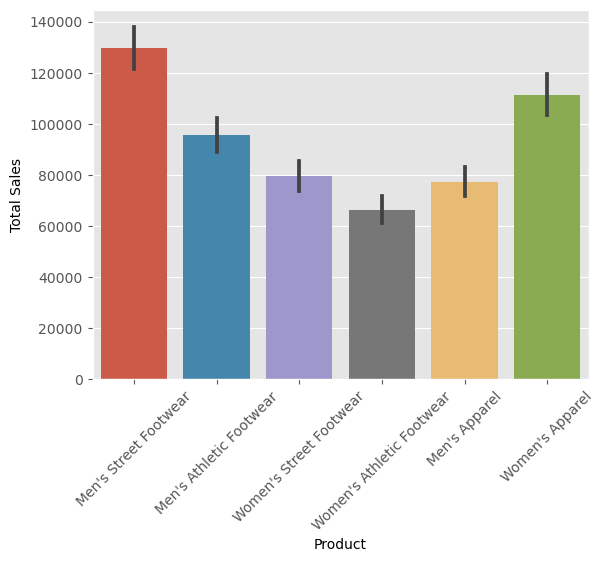

In [180]:
sns.barplot(data= df ,x="Product" , y="Total Sales")
for cotain in figer.containers :
    figer.bar_label(cotain)
plt.xticks(rotation= 45)
plt.show()





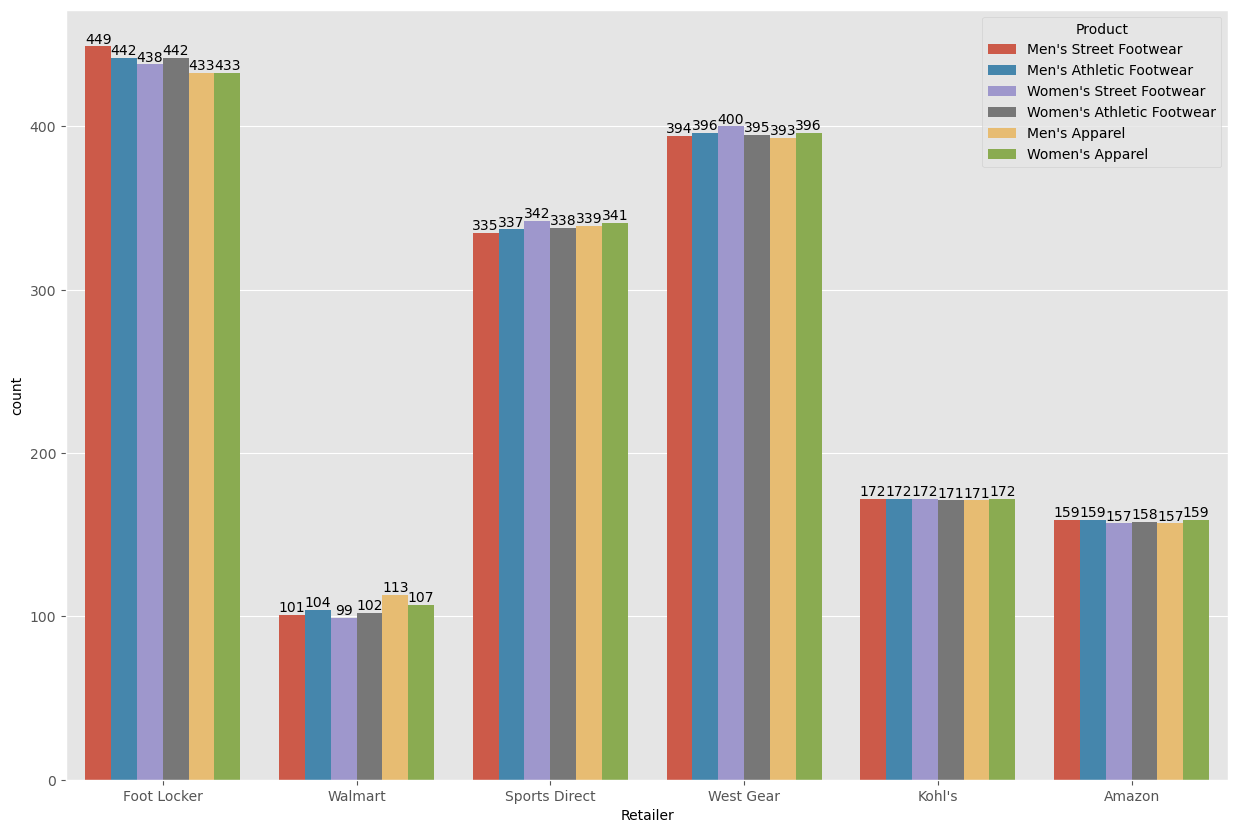

In [181]:
plt.figure(figsize=(15,10))
figer =sns.countplot(data=df , x="Retailer" , hue="Product")
for contain in figer.containers :
    figer.bar_label(contain)

In [ ]:
#from graph
#Foot Locker has the most stores for men’s and women’s street footwear.

#1-Men's Street FootWear
#2-Men's Atheetic

#Walmart has the fewest stores for all product categories except women’s apparel.

#1-Men's Apperal
#2-Women's Apperal

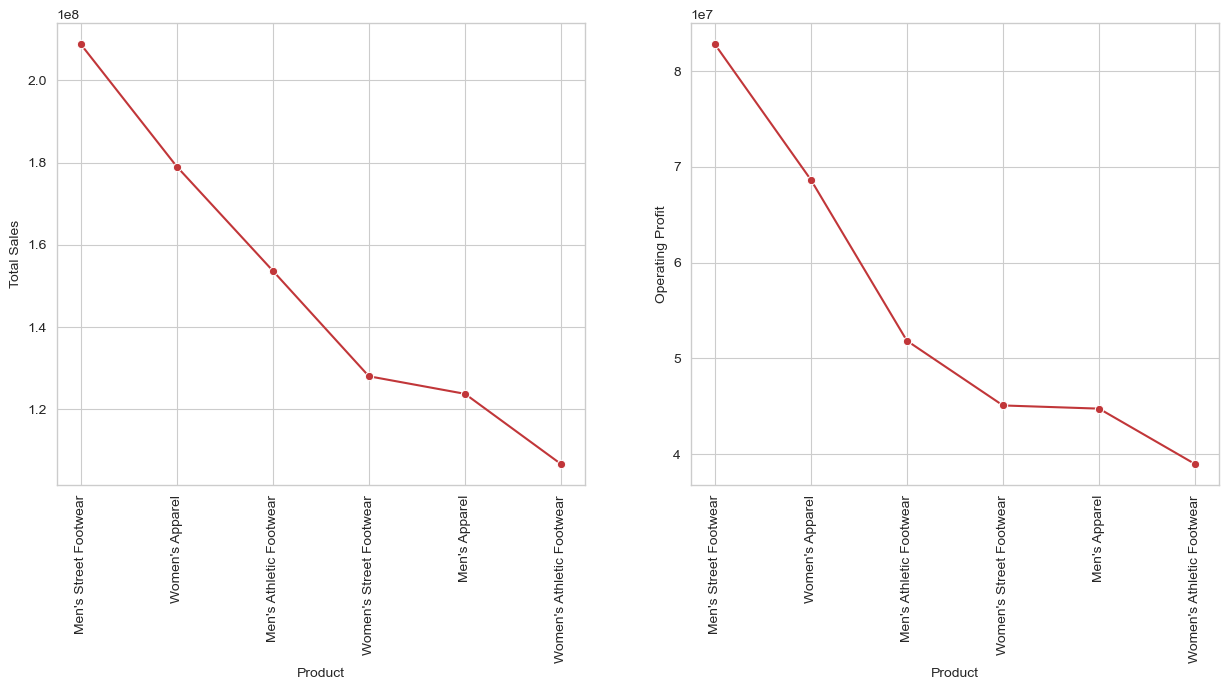

In [188]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =df.groupby("Product")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Product" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =df.groupby("Product")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
sns.lineplot(data= Prof , x="Product" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

In [189]:

tabel =df.groupby("Product")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Product,Total Sales,Operating Profit,Precentage
0,Men's Apparel,123728632.0,44763099.0,14.0
1,Men's Athletic Footwear,153673680.0,51846964.0,17.0
2,Men's Street Footwear,208826244.0,82802323.0,23.0
3,Women's Apparel,179038860.0,68650996.0,20.0
4,Women's Athletic Footwear,106631896.0,38975843.0,12.0
5,Women's Street Footwear,128002813.0,45095897.0,14.0


In [ ]:
#The Top Product have Total Sales and Profit is Mens Street Footwear with 23%

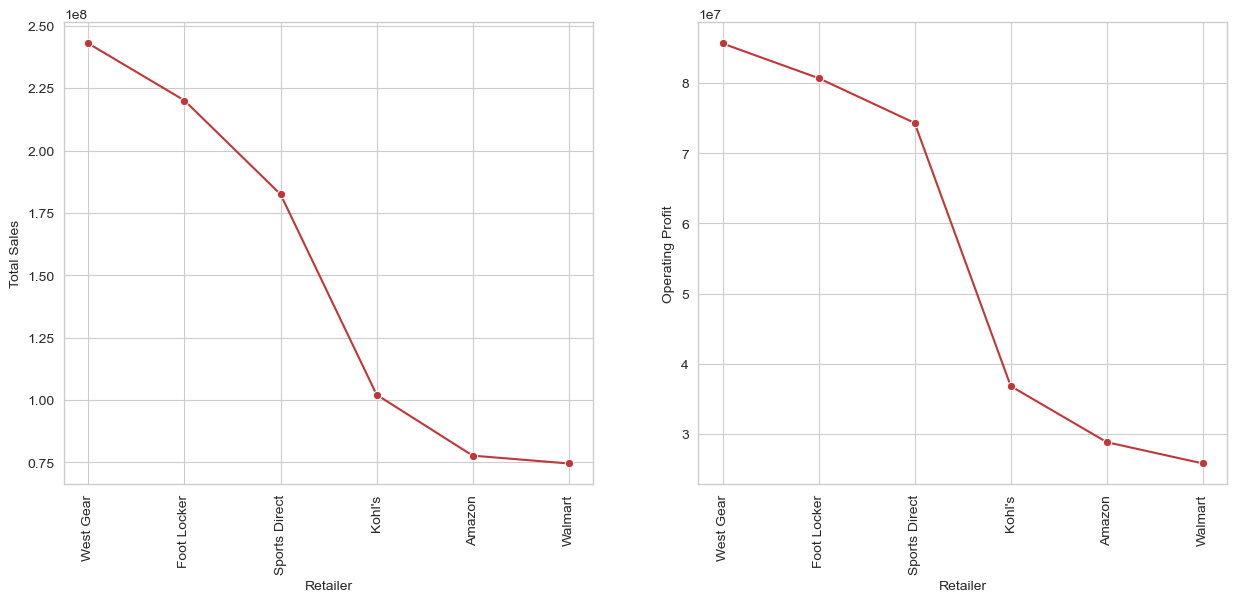

In [191]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =df.groupby("Retailer")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Retailer" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =df.groupby("Retailer")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
sns.lineplot(data= Prof , x="Retailer" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

In [192]:
tabel =df.groupby("Retailer")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Retailer,Total Sales,Operating Profit,Precentage
0,Amazon,77698912.0,28818533.0,9.0
1,Foot Locker,220094720.0,80722234.0,24.0
2,Kohl's,102114753.0,36811302.0,11.0
3,Sports Direct,182470997.0,74333022.0,20.0
4,Walmart,74558410.0,25782063.0,8.0
5,West Gear,242964333.0,85667968.0,27.0


In [ ]:
#The Top Retailer have Total Sales and Profit is West Gear with 27%

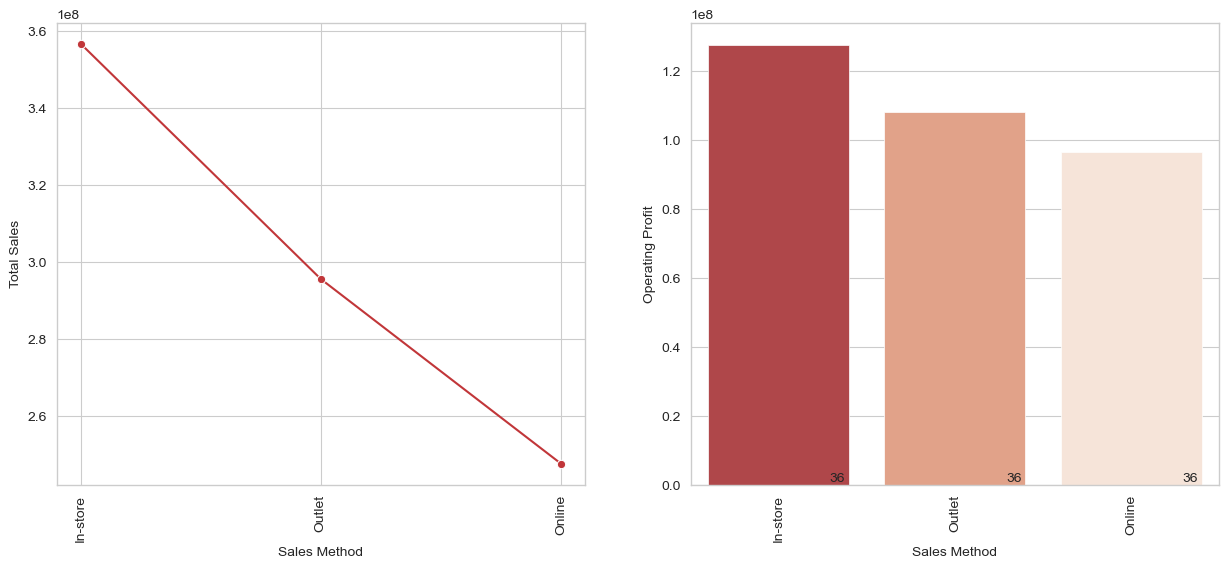

In [193]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =df.groupby("Sales Method")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Sales Method" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =df.groupby("Sales Method")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
figer= sns.barplot(data= Prof , x="Sales Method" ,y="Operating Profit" )
for cotain in figer.containers :
    figer.bar_label(contain)
plt.xticks(rotation = 90)
plt.show()

In [194]:
tabel =df.groupby("Sales Method")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Sales Method,Total Sales,Operating Profit,Precentage
0,In-store,356643750.0,127591382.0,40.0
1,Online,247672882.0,96555337.0,28.0
2,Outlet,295585493.0,107988403.0,33.0


In [ ]:
#The Top sales Method have Total Sales and In-Store with 40%

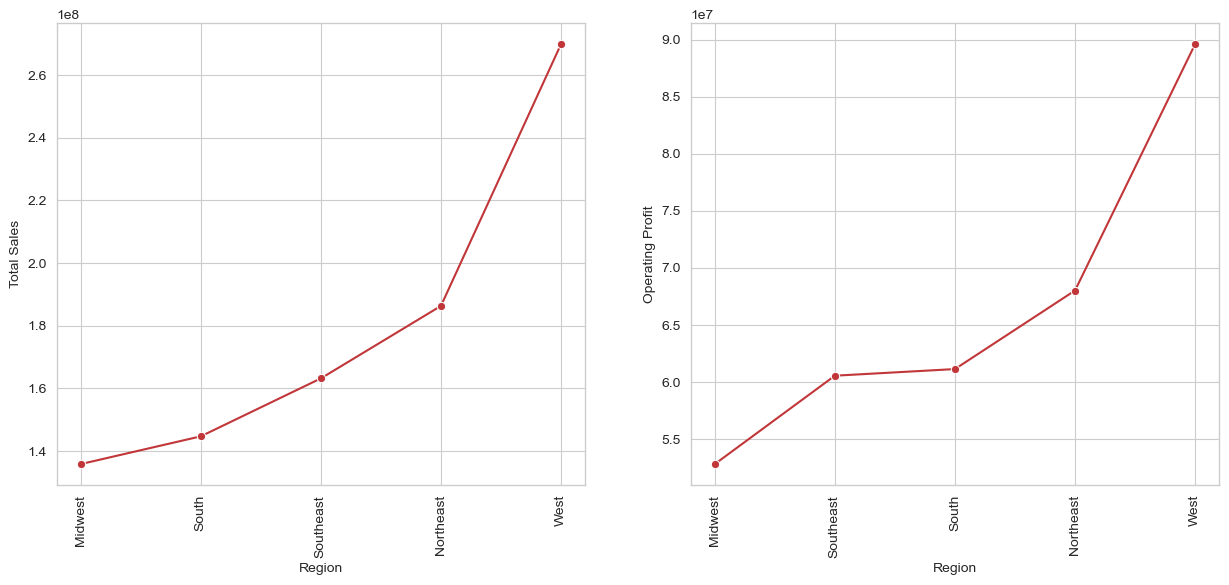

In [196]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =df.groupby("Region")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.lineplot(data= Tot , x="Region" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =df.groupby("Region")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.lineplot(data= Prof , x="Region" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

In [197]:
tabel =df.groupby("Region")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Region,Total Sales,Operating Profit,Precentage
0,Midwest,135800459.0,52811412.0,15.0
1,Northeast,186324067.0,68020688.0,21.0
2,South,144663181.0,61138044.0,16.0
3,Southeast,163171236.0,60555462.0,18.0
4,West,269943182.0,89609516.0,30.0


In [ ]:
#The Top Region Method have Total Sales and Profit West with 30%

In [201]:
top_10_city = df["City"].value_counts().sort_values(ascending=False)[:10] .index 
data_of_Top10 = df[df["City"].isin(top_10_city)]
data_of_Top10.sample()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Discount
6238,Foot Locker,1185732.0,10/7/2021,Southeast,South Carolina,Charleston,Men's Athletic Footwear,42.0,208,8736.0,4368.0,50%,Online,0.0


In [202]:
pd.crosstab(data_of_Top10["City"] ,data_of_Top10.Product )

Product,Men's Apparel,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Athletic Footwear,Women's Street Footwear
City,,,,,,
Birmingham,36,36,36,36,36,36
Charleston,48,48,48,48,48,48
Dallas,36,36,36,36,36,36
Knoxville,36,36,36,36,36,36
Las Vegas,36,36,36,36,36,36
Los Angeles,36,36,36,36,36,36
Manchester,36,36,36,36,36,36
Philadelphia,36,36,36,36,36,36
Portland,60,60,60,60,60,60


In [203]:
Print =data_of_Top10.pivot_table( index= data_of_Top10["City"],
                          columns= data_of_Top10.Product  ,
                          aggfunc= {"Operating Profit" :"sum"} 
                 )

Print

Operating Profit                                                \
Product         Men's Apparel Men's Athletic Footwear Men's Street Footwear   
City                                                                          
Birmingham           947961.0               1553619.0             1409031.0   
Charleston          2354426.0               2222119.0             4110196.0   
Dallas               888523.0               1479447.0             1414952.0   
Knoxville            872332.0               1450139.0             1326396.0   
Las Vegas           1414209.0                967080.0             1649190.0   
Los Angeles         2102695.0               1194797.0             1887416.0   
Manchester           658983.0               1010114.0             1820625.0   
Philadelphia         357928.0                535485.0             1803183.0   
Portland            1338055.0               1982612.0             2537166.0   
Providence           278474.0                447333.0              976907.0   

                                                                                
Product      Women's Apparel Women's Athletic Footwear Women's Street Footwear  
City                                                                            
Birmingham         2381673.0                 1316552.0               1538745.0  
Charleston         3855439.0                 1576007.0               1489018.0  
Dallas             2320665.0                 1313415.0               1426072.0  
Knoxville          2228226.0                 1226813.0               1389764.0  
Las Vegas           786337.0                  920240.0               1323604.0  
Los Angeles        1044740.0                 1208037.0               1607246.0  
Manchester         1144654.0                  521282.0                630551.0  
Philadelphia        600100.0                  356339.0                503714.0  
Portland           1977472.0                 1218527.0               1706981.0  
Providence          702826.0                  267466.0                372822.0

<Axes: xlabel='City', ylabel='Operating Profit'>

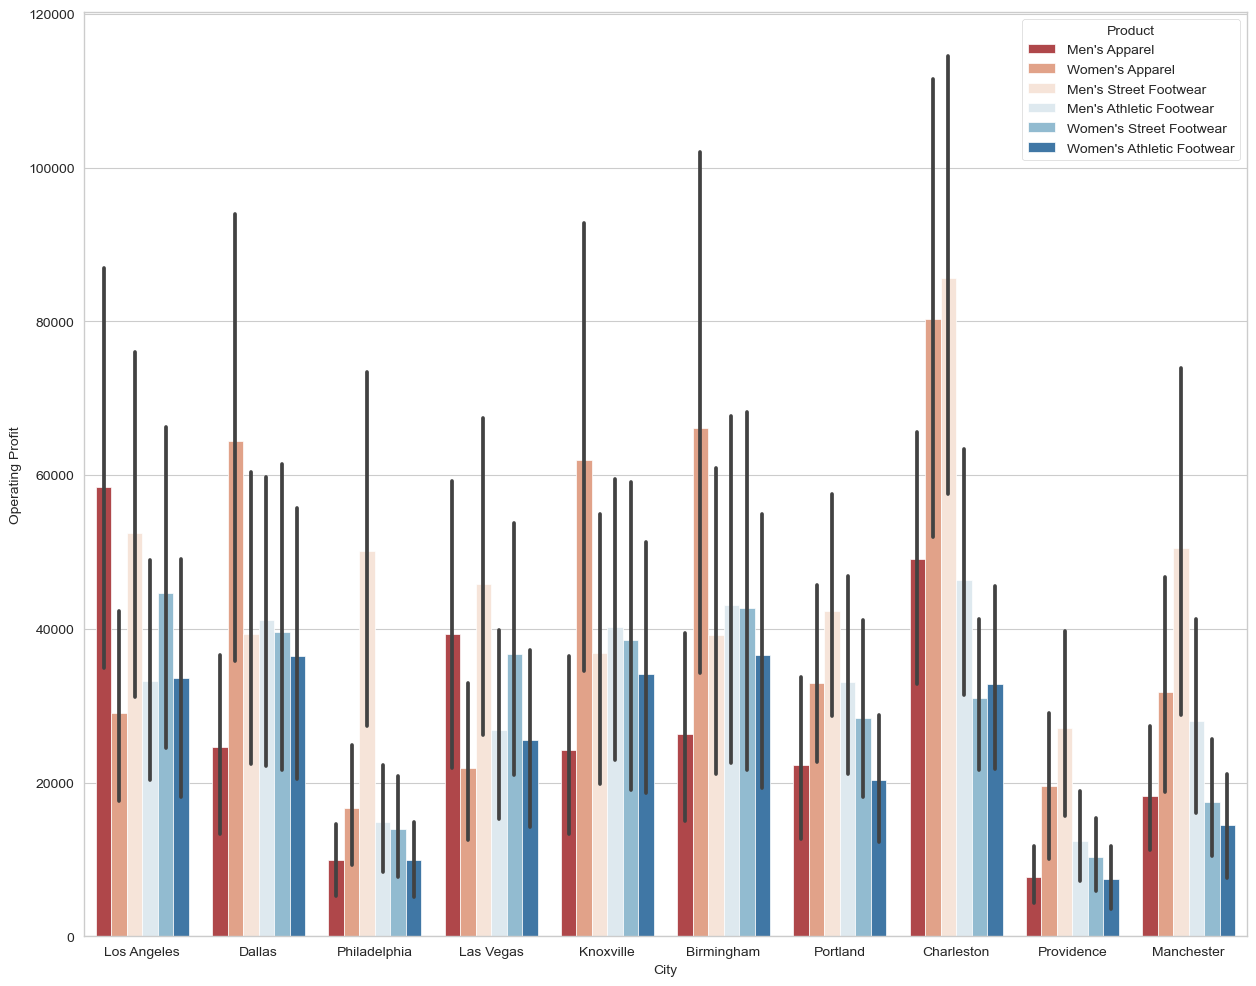

In [204]:
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="City" ,y="Operating Profit" ,hue="Product")

<Axes: xlabel='Sales Method', ylabel='Operating Profit'>

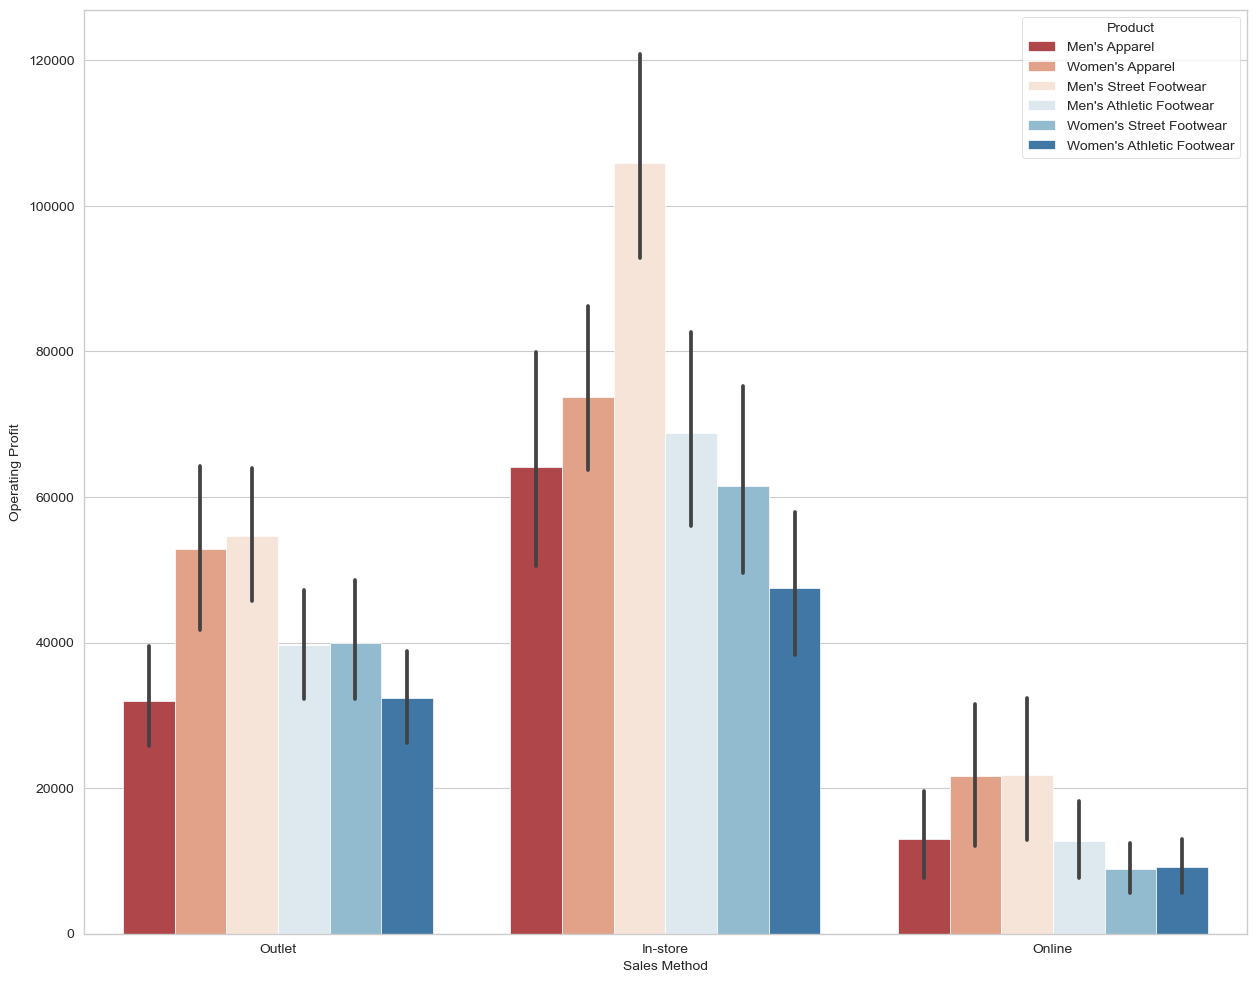

In [205]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="Sales Method" ,y="Operating Profit" ,hue="Product")

<Axes: xlabel='Region', ylabel='Operating Profit'>

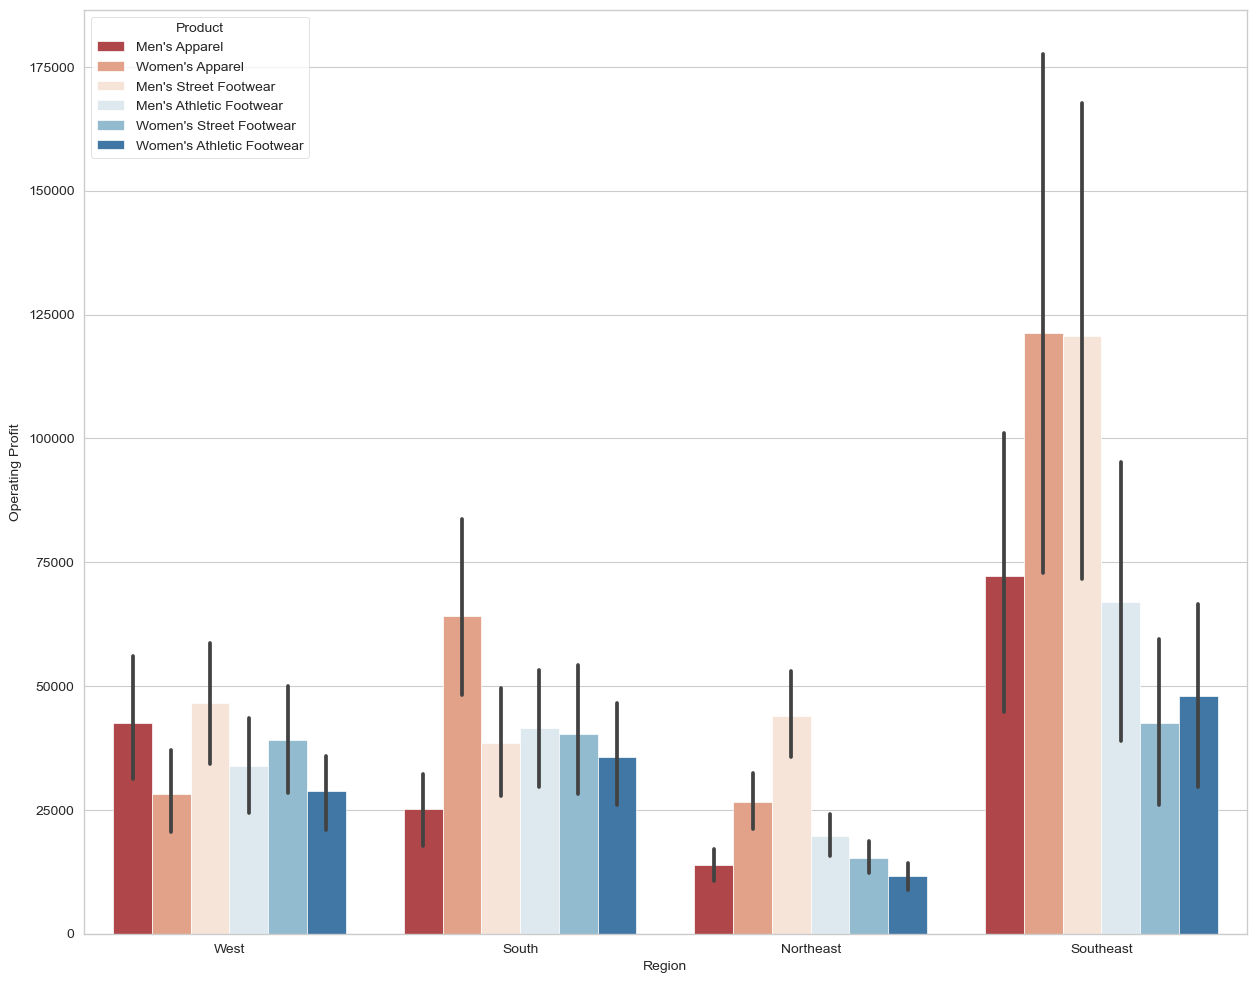

In [206]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="Region" ,y="Operating Profit" ,hue="Product")